In [6]:
!pip install tensorflow



   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 1.3/390.3 MB 8.4 MB/s eta 0:00:47
   ---------------------------------------- 2.6/390.3 MB 7.2 MB/s eta 0:00:54
   ---------------------------------------- 4.2/390.3 MB 7.2 MB/s eta 0:00:54
    --------------------------------------- 5.5/390.3 MB 7.3 MB/s eta 0:00:53
    --------------------------------------- 7.1/390.3 MB 7.3 MB/s eta 0:00:53
    --------------------------------------- 8.7/390.3 MB 7.2 MB/s eta 0:00:54
   - -------------------------------------- 10.0/390.3 MB 7.1 MB/s eta 0:00:54
   - -------------------------------------- 11.5/390.3 MB 7.1 MB/s eta 0:00:54
   - -------------------------------------- 12.8/390.3 MB 7.1 MB/s eta 0:00:53
   - -------------------------------------- 14.4/390.3 MB 7.1 MB/s eta 0:00:53
   - -------------------------------------- 15.7/390.3 MB 7.1 MB/s eta 0:00:53
   - -------------------------------------- 17.3/390.3 MB 7.1 MB/s

In [8]:
import tensorflow as tf
print(tf.__version__)



2.18.0


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [12]:
# Load the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Print shapes to verify
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [14]:
# Reshape to add channel dimension and normalize
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

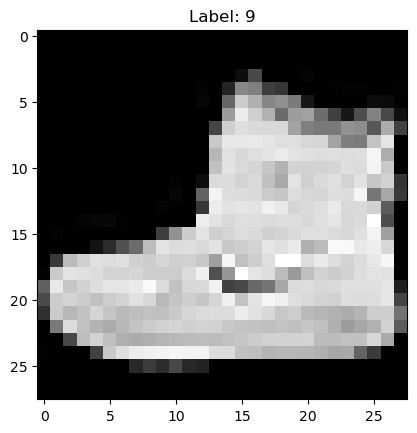

In [16]:
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

In [18]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes for Fashion MNIST
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

C:\Users\rishu\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.7725 - loss: 0.6344 - val_accuracy: 0.8728 - val_loss: 0.3552
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8848 - loss: 0.3155 - val_accuracy: 0.8848 - val_loss: 0.3185
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9018 - loss: 0.2602 - val_accuracy: 0.9018 - val_loss: 0.2690
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9150 - loss: 0.2298 - val_accuracy: 0.8850 - val_loss: 0.3007
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9231 - loss: 0.2029 - val_accuracy: 0.9043 - val_loss: 0.2684


In [22]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9038 - loss: 0.2739
Test accuracy: 90.43%


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Predicted label: 9
Actual label: 9


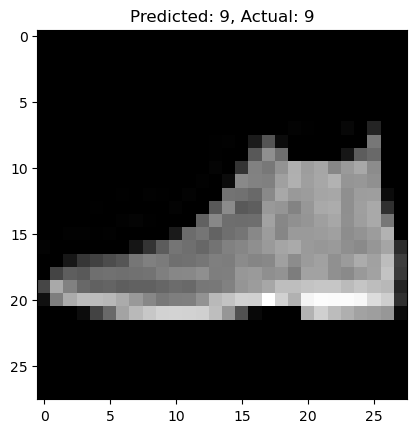

In [24]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Get the predicted label for the first image
predicted_label = np.argmax(predictions[0])
print("Predicted label:", predicted_label)
print("Actual label:", y_test[0])

# Visualize the first test image with prediction
plt.imshow(X_test[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_label}, Actual: {y_test[0]}")
plt.show()

In [26]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9324 - loss: 0.1798 - val_accuracy: 0.9044 - val_loss: 0.2654
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9409 - loss: 0.1586 - val_accuracy: 0.9032 - val_loss: 0.2857
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9484 - loss: 0.1387 - val_accuracy: 0.9037 - val_loss: 0.2796
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9544 - loss: 0.1215 - val_accuracy: 0.9101 - val_loss: 0.2710
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9602 - loss: 0.1069 - val_accuracy: 0.9103 - val_loss: 0.2941


In [61]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9085 - loss: 0.3087
Test accuracy: 91.03%


In [62]:
model.save("fashion_cnn_model.h5")

In [65]:
from tensorflow.keras.models import load_model
model = load_model("fashion_cnn_model.h5")

In [77]:
from PIL import Image, ImageOps, ImageDraw, ImageFont
import os
import random

# Define paths for high-quality images
image_paths = [
    r"C:\temproop\mathieu-perrier-44OaWM_ObWk-unsplash.jpg",
    r"C:\temproop\andrey-zvyagintsev-HiDFZMT8Z5s-unsplash.jpg",
    r"C:\temproop\laureen-missaire-HTnW_59fj04-unsplash.jpg",
    r"C:\temproop\korie-cull-IzIME1jwjCY-unsplash.jpg",
    r"C:\temproop\malicki-m-beser-PKMvkg7vnUo-unsplash.jpg",
    r"C:\temproop\michael-lee-5Z9bgfRZLLE-unsplash.jpg",
    r"C:\temproop\chalo-garcia-l-hcBVh2UNk-unsplash.jpg",
    r"C:\temproop\clark-tibbs-oqStl2L5oxI-unsplash.jpg",
    r"C:\temproop\jay-soundo-a5_-HXSLlbA-unsplash.jpg",
    r"C:\temproop\mathieu-perrier-44OaWM_ObWk-unsplash.jpg",
    r"C:\temproop\efe-kurnaz-RnCPiXixooY-unsplash.jpg" 
]

# Shuffle image list for a unique layout
random.shuffle(image_paths)

# Function to create a polished mood board with enhancements
def create_mood_board(image_paths, board_width=1600, num_columns=4, spacing=20):
    column_width = (board_width - (num_columns - 1) * spacing) // num_columns
    columns = [[] for _ in range(num_columns)]
    column_heights = [0] * num_columns

    for path in image_paths:
        try:
            img = Image.open(path)
            w, h = img.size
            new_height = int((column_width / w) * h)
            img = img.resize((column_width, new_height), Image.Resampling.LANCZOS)
            
            # Add a soft border for aesthetics
            img = ImageOps.expand(img, border=5, fill="white")
            
            min_col = column_heights.index(min(column_heights))
            columns[min_col].append((img, new_height))
            column_heights[min_col] += new_height + spacing
        except Exception as e:
            print(f"Error processing {path}: {e}")

    board_height = max(column_heights) - spacing
    board = Image.new("RGB", (board_width, board_height + 150), "white")  # Extra space for title

    # Draw header text
    draw = ImageDraw.Draw(board)
    try:
        font = ImageFont.truetype("arial.ttf", 50)  # Ensure this font is available
    except:
        font = ImageFont.load_default()
    
    title_text = "Fashion Mood Board"
    text_w, text_h = draw.textbbox((0, 0), title_text, font=font)[2:]  # Fix for new PIL version
    draw.text(((board_width - text_w) // 2, 20), title_text, fill="black", font=font)

    # Add color swatches (Extracted manually for now)
    color_palette = [(128, 0, 64), (204, 153, 102), (232, 218, 192)]  # Burgundy, tan, soft beige
    swatch_size = 60
    swatch_x = 50
    swatch_y = board_height + 60

    for color in color_palette:
        draw.rectangle([swatch_x, swatch_y, swatch_x + swatch_size, swatch_y + swatch_size], fill=color)
        swatch_x += swatch_size + 10

    # Arrange images on the board
    for col_idx in range(num_columns):
        x = col_idx * (column_width + spacing)
        y = 100  # Offset for title space
        for img, img_height in columns[col_idx]:
            board.paste(img, (x, y))
            y += img_height + spacing

    return board

# Generate the final mood board
mood_board = create_mood_board(image_paths)
if mood_board:
    mood_board.show()
    mood_board.save(r"C:\temproop\moodboard_final.jpg")  # Save for presentation
